In [39]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Q1

In [3]:
df = pd.read_csv("Cutlets.csv")
df.head(2)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093


In [18]:
A = df["Unit A"]
B = df["Unit B"]

In [45]:
A.std(), B.std()

(0.2884084841815496, 0.343400647063108)

/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_63365/2835792195.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(A)
/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_63365/2835792195.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(B)


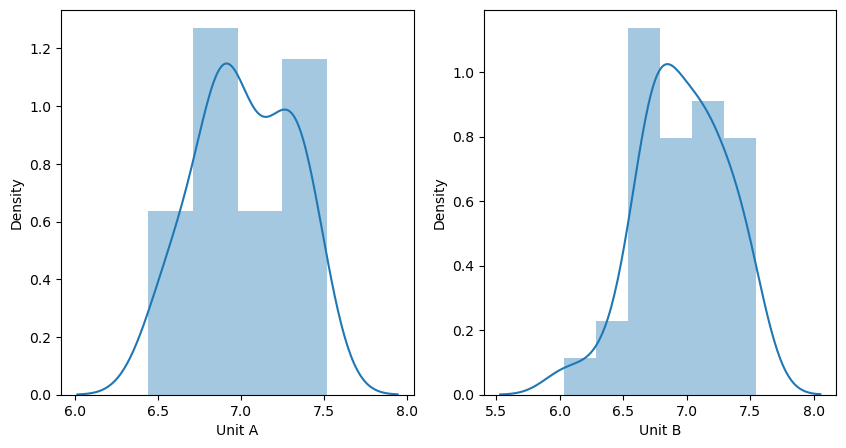

In [61]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(A)

plt.subplot(1,2,2)
sns.distplot(B)

plt.show()

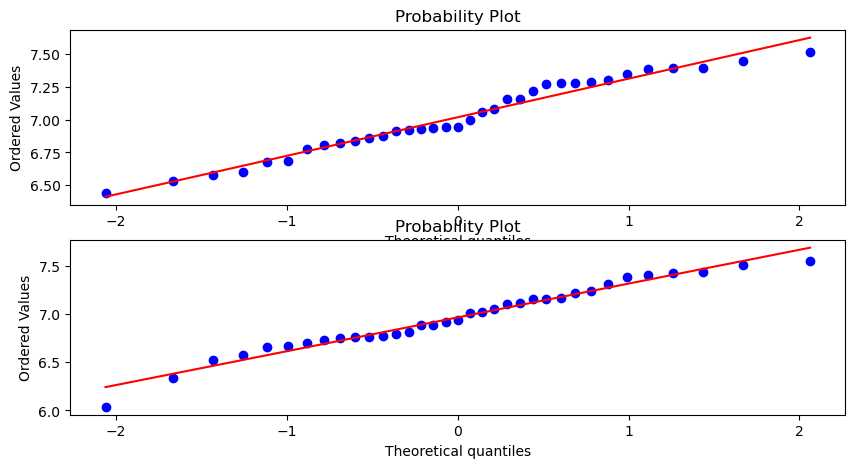

In [60]:
plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
stats.probplot(A, dist="norm", plot=plt)

plt.subplot(2,1,2)
stats.probplot(B, dist="norm", plot=plt)

plt.show()

###### Since there are no significant outliers in the QQ plots obtained and the points lie along the 45 degree line, we can state that the features roughly follow normal distribution.
Assumptions: 
1. No significant outliers
2. The distribution is approximately normal
3. Homogeneity of variance (both standard deviations are similar (0.29 and 0.34)

In [5]:
df.isna().sum()

Unit A    0
Unit B    0
dtype: int64

###### Null hypothesis, H_0 : both the means are equal, 
###### Alternate hypothesis, H_1 : both the means are different

In [10]:
stat_vals = stats.ttest_ind(df["Unit A"], df["Unit B"])

In [11]:
stat_vals[0], stat_vals[1]

(0.7228688704678063, 0.4722394724599501)

In [21]:
N1 = len(A)
N2 = len(B)
dof = N1 + N2 - 2

In [24]:
std1 = A.std()
std2 = B.std()
std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / dof)

In [46]:
diff_mean = A.mean() - B.mean()
MoE = stats.t.ppf(0.975, dof) * std_N1N2 * np.sqrt(1/N1 + 1/N2)

In [47]:
0.05 + (0.95/2)

0.525

In [48]:
diff_mean,MoE

(0.05479428571428624, 0.15125882328287174)

In [49]:
print('The results of the independent t-test are: \n\tt-value = {:4.6f}\n\tp-value = {:4.6f}'.format(stat_vals[0], stat_vals[1]))
print ('\nThe difference between groups is {:3.5f} [{:3.5f} to {:3.5f}] (mean [5% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = 0.722869
	p-value = 0.472239

The difference between groups is 0.05479 [-0.09646 to 0.20605] (mean [5% CI])


###### We accept the null hypothesis as the p value is greater than 0.05. This means both the means are equal.

# Q2

In [51]:
df_tat = pd.read_csv("LabTAT.csv")
df_tat.head(2)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79


In [52]:
l1 = df_tat["Laboratory 1"]
l2 = df_tat["Laboratory 2"]
l3 = df_tat["Laboratory 3"]
l4 = df_tat["Laboratory 4"]

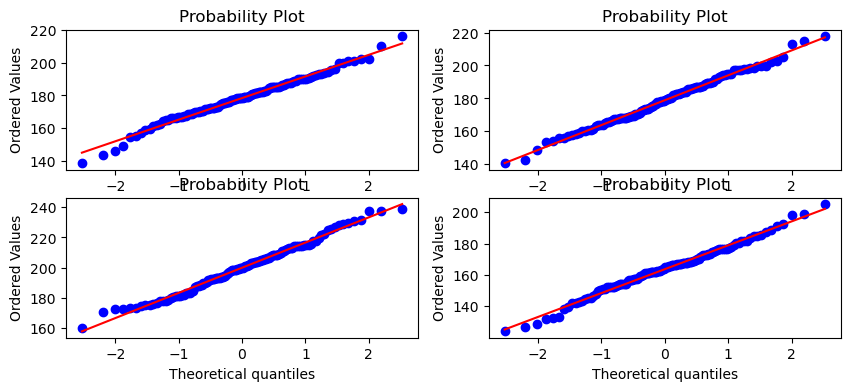

In [58]:
plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
stats.probplot(l1, dist="norm", plot=plt)
plt.subplot(2,2,2)
stats.probplot(l2, dist="norm", plot=plt)
plt.subplot(2,2,3)
stats.probplot(l3, dist="norm", plot=plt)
plt.subplot(2,2,4)
stats.probplot(l4, dist="norm", plot=plt)

plt.show()

###### Assumptions for Anova:
1. Data is normally distributed
2. Homogeneity of variance
3. Observations are independent of each other

Null hypothesis, H0: All means are equal
Alternate hypothesis, H1: At least one mean is different than the other.

In [63]:
stats.f_oneway(df_tat.iloc[:,0] , df_tat.iloc[:,1] ,df_tat.iloc[:,2], df_tat.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

###### Since the p-value is very less compared to 0.05, the null hypothesis is rejected.

# Q3

###### Chi square test is to be conducted  
Null hypothesis, H_0 : Male-Female buyer ratios are similar across regions.  
Alternate hypothesis, H_1 : Ratios are not similar across regions.

###### Assumptions for Chi square test  
1. Data in cells should be frequencies  
2. Categories of variable are mutually exclusive
3. Study groups are independent

In [65]:
df_bu = pd.read_csv("BuyerRatio.csv")
df_bu

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [89]:
df_bu1 = df_bu.iloc[: , 1:]
df_bu1

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [90]:
stats.chi2_contingency(df_bu1)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

###### Since the p value is greater than 0.05, we accept the null hypothesis.

# Q4

In [75]:
df_c = pd.read_csv("Costomer+OrderForm.csv")
df_c.head(2)
Cols = df_c.columns.to_list
print(Cols)

<bound method IndexOpsMixin.tolist of Index(['Phillippines', 'Indonesia', 'Malta', 'India'], dtype='object')>


###### Anova test to be conducted. 
Null hypothesis, H_0: All means are equal.  
Alternate hypothesis, H_1: At least one mean is different

###### Assumptions for Chi square test  
1. Data in cells should be frequencies  
2. Categories of variable are mutually exclusive
3. Study groups are independent

In [80]:
df_c = df_c.replace(to_replace="Error Free", value= 1)
df_c = df_c.replace(to_replace="Defective", value= 0)

In [81]:
df_c

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
295,1,1,1,1
296,1,1,1,1
297,1,1,0,1
298,1,1,1,1


In [82]:
stats.f_oneway(df_c.iloc[:,0] , df_c.iloc[:,1] ,df_c.iloc[:,2], df_c.iloc[:,3])

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)

###### Since the p-value is greaater than 0.05, we accept the null hypothesis (All means are equal). This means that the error does not vary by center.